<a href="https://colab.research.google.com/github/MerveKaragulTabas/DL--Deep-Learning/blob/main/Assignment_2_(CNN_Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [2]:
len(x_train)

60000

In [3]:
len(y_train)

60000

In [4]:
len(x_test)

10000

In [5]:
len(y_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train[10].shape

(28, 28)

In [8]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

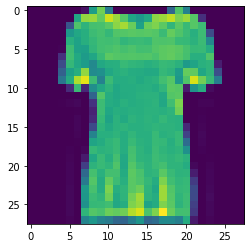

In [13]:
plt.imshow(x_train[10]);

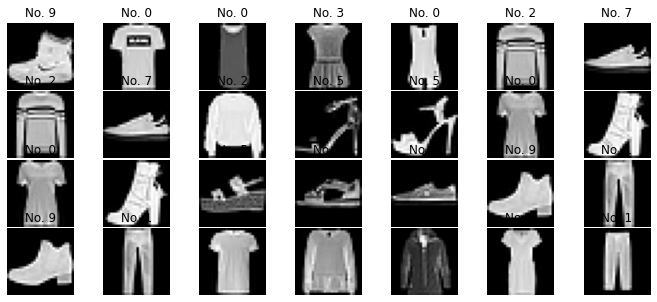

In [14]:
num_rows, num_cols = 4, 7      
f, ax = plt.subplots(4, 7, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [15]:
x_train.max()

255

In [16]:
x_train.min()

0

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
x_train.min()

0.0

In [19]:
x_train.max()

1.0

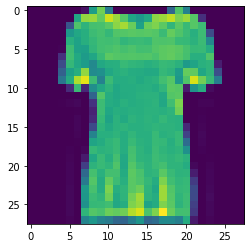

In [20]:
plt.imshow(x_train[10]);

**Reshape the X into 4 dimension**

In [21]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [22]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [27]:
Y_train[0].reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [30]:
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [31]:
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [34]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test))

Epoch 1/10
1875/1875 [==============================] - 23s 7ms/step - loss: 0.4203 - accuracy: 0.8480 - val_loss: 0.3499 - val_accuracy: 0.8748
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2755 - accuracy: 0.9009 - val_loss: 0.2995 - val_accuracy: 0.8942
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2426 - accuracy: 0.9137 - val_loss: 0.2859 - val_accuracy: 0.9024
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2247 - accuracy: 0.9200 - val_loss: 0.2940 - val_accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2148 - accuracy: 0.9244 - val_loss: 0.2823 - val_accuracy: 0.9109
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2041 - accuracy: 0.9293 - val_loss: 0.3620 - val_accuracy: 0.9023
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2018 - accuracy: 0.9315 - val_loss: 0.3208 - val_ac

**Plot values of metrics you used in your model.**

In [35]:
summary= pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.420306,0.848050,0.349929,0.8748
1,0.275518,0.900933,0.299526,0.8942
2,0.242643,0.913750,0.285930,0.9024
3,0.224740,0.919983,0.293991,0.9021
4,0.214811,0.924367,0.282268,0.9109


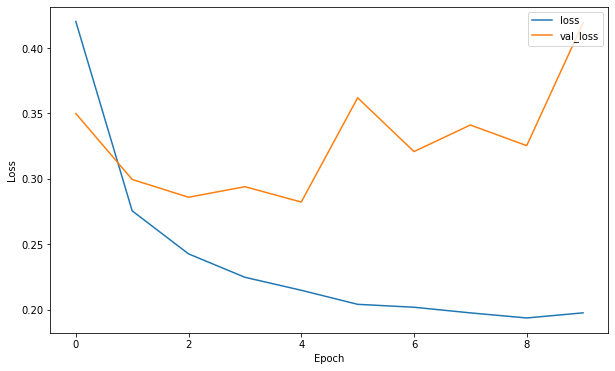

In [36]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

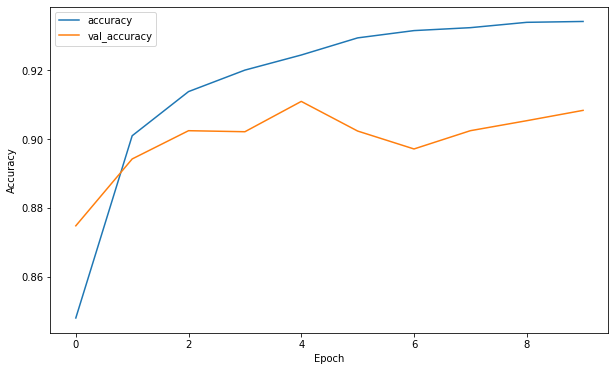

In [37]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [40]:
model.fit(x_train, Y_train, batch_size=32, epochs=32, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1970 - accuracy: 0.9345 - val_loss: 0.3411 - val_accuracy: 0.8971
Epoch 2/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1919 - accuracy: 0.9368 - val_loss: 0.3611 - val_accuracy: 0.8981
Epoch 3/32
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1963 - accuracy: 0.9365 - val_loss: 0.3997 - val_accuracy: 0.9042
Epoch 4/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1861 - accuracy: 0.9384 - val_loss: 0.4286 - val_accuracy: 0.8893
Epoch 5/32
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1952 - accuracy: 0.9375 - val_loss: 0.4182 - val_accuracy: 0.9102
Epoch 6/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1886 - accuracy: 0.9387 - val_loss: 0.5124 - val_accuracy: 0.9012


**Plot values of metrics you used in your model.**

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.197048,0.934500,0.341147,0.8971
1,0.191938,0.936817,0.361144,0.8981
2,0.196343,0.936500,0.399684,0.9042
3,0.186104,0.938367,0.428640,0.8893
4,0.195158,0.937483,0.418213,0.9102


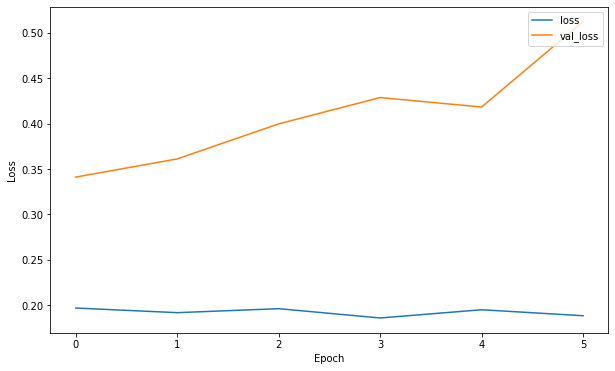

In [42]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

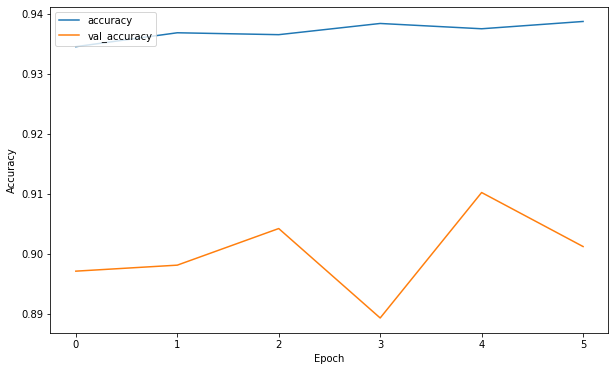

In [43]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5124 - accuracy: 0.9012


[0.5123614072799683, 0.901199996471405]

In [46]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [47]:
preds = model.predict(x_test)
preds

array([[1.6554013e-13, 2.1875297e-15, 1.0392069e-13, ..., 1.1760142e-08,
        3.0237784e-15, 9.9998176e-01],
       [3.3625322e-26, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.5632718e-38, 0.0000000e+00],
       [6.3795258e-27, 1.0000000e+00, 7.1955365e-38, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.0371929e-26, 0.0000000e+00, 2.0102733e-34, ..., 5.4295922e-30,
        1.0000000e+00, 0.0000000e+00],
       [9.4788529e-19, 1.0000000e+00, 1.9614703e-23, ..., 1.4849731e-31,
        4.1334712e-29, 1.6595843e-26],
       [1.4017215e-06, 1.2246757e-06, 6.4003674e-05, ..., 3.3423509e-03,
        1.3008856e-03, 7.2374660e-06]], dtype=float32)

In [48]:
predictions= np.argmax(preds, axis=1)

In [49]:
len(predictions)

10000

In [50]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.90      0.83      1000
           3       0.93      0.88      0.90      1000
           4       0.85      0.84      0.84      1000
           5       0.98      0.96      0.97      1000
           6       0.81      0.66      0.73      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [52]:
print(confusion_matrix(y_test, predictions))

[[882   0  29   6   5   1  71   1   5   0]
 [  3 980   3   6   3   0   5   0   0   0]
 [ 15   2 899   8  46   0  27   0   3   0]
 [ 43   7  16 880  33   0  19   0   2   0]
 [  0   0 104  25 837   0  34   0   0   0]
 [  0   0   1   0   0 959   1  28   4   7]
 [131   1 115  23  59   0 664   0   7   0]
 [  0   0   0   0   0   7   0 976   0  17]
 [  5   3   6   2   4   1   1   3 975   0]
 [  0   0   0   0   0   8   0  32   0 960]]


In [53]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5123614072799683
Test accuracy: 0.901199996471405


# Prediction

In [54]:
model.predict(x_test)

array([[1.6554013e-13, 2.1875297e-15, 1.0392069e-13, ..., 1.1760142e-08,
        3.0237784e-15, 9.9998176e-01],
       [3.3625322e-26, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.5632718e-38, 0.0000000e+00],
       [6.3795258e-27, 1.0000000e+00, 7.1955365e-38, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.0371929e-26, 0.0000000e+00, 2.0102733e-34, ..., 5.4295922e-30,
        1.0000000e+00, 0.0000000e+00],
       [9.4788529e-19, 1.0000000e+00, 1.9614703e-23, ..., 1.4849731e-31,
        4.1334712e-29, 1.6595843e-26],
       [1.4017215e-06, 1.2246757e-06, 6.4003674e-05, ..., 3.3423509e-03,
        1.3008856e-03, 7.2374660e-06]], dtype=float32)

In [55]:
len(x_test)

10000

In [56]:
my_number = x_test[5]

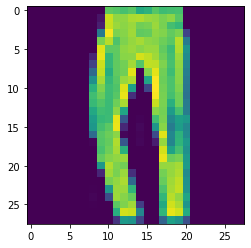

In [57]:
plt.imshow(my_number.reshape(28,28)); 

In [58]:
model.predict(my_number.reshape(1,28,28,1))

array([[5.8348921e-21, 1.0000000e+00, 5.0390238e-26, 1.0400069e-21,
        9.6916843e-20, 1.2453734e-25, 1.7517144e-18, 5.7874116e-35,
        1.5198369e-28, 9.7187155e-34]], dtype=float32)

In [59]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])

# End of Assignment

In [61]:
model.save("cnn-1.h5")